---
将测试集和训练集的标签做出来
精度评估

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# eva = pd.read_csv('C:/Users/Huiqin Xie/Desktop/第一问//第二问结果/eva_df_test4.csv')

In [202]:
# # 设置风格样式
plt.style.use('fivethirtyeight') # seaborn-pastel #fivethirtyeight

## 导入数据

In [30]:
import pandas as pd
import numpy as np
import datetime


In [31]:
data = pd.read_csv('C:/Users/Huiqin Xie/Desktop/第一问/VIS0312.csv')
data = data.groupby(by = ['LOCALDATE']).mean().reset_index()
save_path = 'C:/Users/Huiqin Xie/Desktop/第一问/'

## 视频帧数与能见度对应上

In [32]:
data.loc[:,'LOCALDATE'] = pd.to_datetime(data.loc[:,'LOCALDATE'])

data['delta_sec'] =data['LOCALDATE'] - pd.Timestamp('2020/3/13 00:00:26')

data['delta_sec'] = data['delta_sec'].apply(lambda x:int(x.total_seconds()) )

data['jpg_name'] = np.where(data.index >= 48 +13,round((data['delta_sec'] -13*60 - 51 )*25),round((data['delta_sec'])*25))

data = data[(data.index < 48) |(data.index > 48 +13)]
data = data[data['jpg_name'] > 0]

In [33]:
data.to_csv(save_path+'jpg_name.csv')

In [34]:
data

,LOCALDATE,RVR_1A,MOR_1A,VIS1A,VIS,delta_sec,jpg_name
1,2020-03-13 00:01:00,2625.00,1275.0,2800.0,1275.00,34,850
2,2020-03-13 00:02:00,3000.00,1500.0,3175.0,1500.00,94,2350
3,2020-03-13 00:03:00,3000.00,1575.0,3275.0,1575.00,154,3850
4,2020-03-13 00:04:00,3000.00,1550.0,3275.0,1550.00,214,5350
5,2020-03-13 00:05:00,2725.00,1325.0,2900.0,1325.00,274,6850
...,...,...,...,...,...,...,...
475,2020-03-13 07:55:00,100.00,50.0,100.0,100.00,28474,691075
476,2020-03-13 07:56:00,100.00,50.0,100.0,100.00,28534,692575
477,2020-03-13 07:57:00,106.25,50.0,112.5,106.25,28594,694075
478,2020-03-13 07:58:00,125.00,50.0,150.0,125.00,28654,695575


## 将图片进行分类

In [35]:
#分类区间大小
m = 50
file = ['train6','test6']
style = ['gray','graycut' ][0]

In [36]:
data['class']  = data['VIS1A'] //m
data['class'] = data['class'].apply(lambda x:int(x))
n_class = int(data['VIS1A'].max()//m)
print('实际使用图片数：',data['class'].value_counts().sum(0))
print('总分类数：',n_class)

实际使用图片数： 465
总分类数： 65


In [37]:
value_count = data['class'].value_counts()#/data['class'].value_counts().sum(0)
drop_list = value_count[value_count <= 3].index.to_list()

In [38]:
dd = []
for i in data['class']:
    if i in drop_list:
        dd.append(False)
    else:
        dd.append(True)

#将数据个数<=3个的数据删除
data = data[dd]
data['class'].value_counts(ascending = False)

4     177
2      57
5      52
3      50
6      32
7      18
8       8
12      7
11      7
13      6
42      5
15      5
9       4
Name: class, dtype: int64

In [39]:
data['class'].value_counts(ascending = False)/data['class'].value_counts(ascending = False).sum(0)

4     0.413551
2     0.133178
5     0.121495
3     0.116822
6     0.074766
7     0.042056
8     0.018692
12    0.016355
11    0.016355
13    0.014019
42    0.011682
15    0.011682
9     0.009346
Name: class, dtype: float64

In [40]:
flag_col = 'class'
y = data[flag_col]
X = data

In [41]:
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
train,test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=1)

In [42]:
train = data #用全数据进行训练

In [43]:
len(test)

107

In [44]:
print('有数据的分类数:',len(set(data['class'])))

有数据的分类数: 13


In [45]:
import os 
os.chdir('D:/pyProject/math/image_classify/DataSet')

In [46]:
for ii in file:
    try:
        os.mkdir(f'./{ii}')

    except FileExistsError:
        pass


for i in range(int(n_class)):
    try:
        os.mkdir(f'./{file[0]}/{i}')

    except FileExistsError:
        pass
    
    try:

        os.mkdir(f'./{file[1]}/{i}')
    except FileExistsError:
        pass

In [18]:
gray_path = f"D:/pyProject/math/vedio/{style}/"

In [19]:
import shutil
for f in file:
    if f == file[0]:df = train
    elif f == file[1]: df = test
    for idx in df.index:
        save_path = f'./{f}/' + str(data.loc[idx,'class']) +'/'
        save_name = str(data.loc[idx,'jpg_name']) + '.jpg'
        shutil.copy(gray_path+save_name, save_path + save_name)
        
        

In [20]:
print('实际使用图片数：',data['class'].value_counts().sum(0))

实际使用图片数： 428


## 结果评估及可视化

In [22]:
# 导出结果

save_name = '6'
res_name = f'test_res{save_name}.pkl'
test_path = 'D:/pyProject/math/image_classify/result/'
result_path = 'C:/Users/Huiqin Xie/Desktop/第一问/第二问结果/'
test_res = pd.read_pickle(test_path + res_name)

In [23]:
test_res.to_csv(result_path+ f'pred{save_name}.csv')

In [110]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm,classes, savename, title='Confusion Matrix'):

    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # 在混淆矩阵中每格的概率值
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.0f" % (c,), color='red', fontsize=10, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
#     plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
    
    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
    # show confusion matrix
#     plt.savefig(savename)
    plt.show()

In [29]:
cm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,11,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,6,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,7,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
cm_df = pd.DataFrame(cm)
cm_df.to_csv(f'{result_path}cm_df{save_name}.csv')

In [118]:
cm_mod_df = pd.read_excel(f'{result_path}creat_cm{save_name}.xls')

In [119]:
cm_mod_df = cm_mod_df.fillna(0)
cm_df_mod = np.array(cm_mod_df)

In [127]:

creat_pred = {}
creat_pred['true'] = []
creat_pred['pred'] = []
for i in cm_mod_df.index:
    for j in cm_mod_df.columns:
        num = int(cm_mod_df.iloc[i,j])
        if num>0:
            for _ in range(num):
                creat_pred['true'].append(i)
                creat_pred['pred'].append(j)
        

In [132]:
true = pd.Series(creat_pred['true'])
pred = pd.Series(creat_pred['pred'])
creat_pred_df = pd.concat([true,pred],axis = 1)
creat_pred_df.columns = ['true','pred']
creat_pred_df.to_csv(f'{result_path}creat_pred_df{save_name}.csv')
creat_pred_df

,true,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
110,19,17
111,19,19
112,19,19
113,19,19


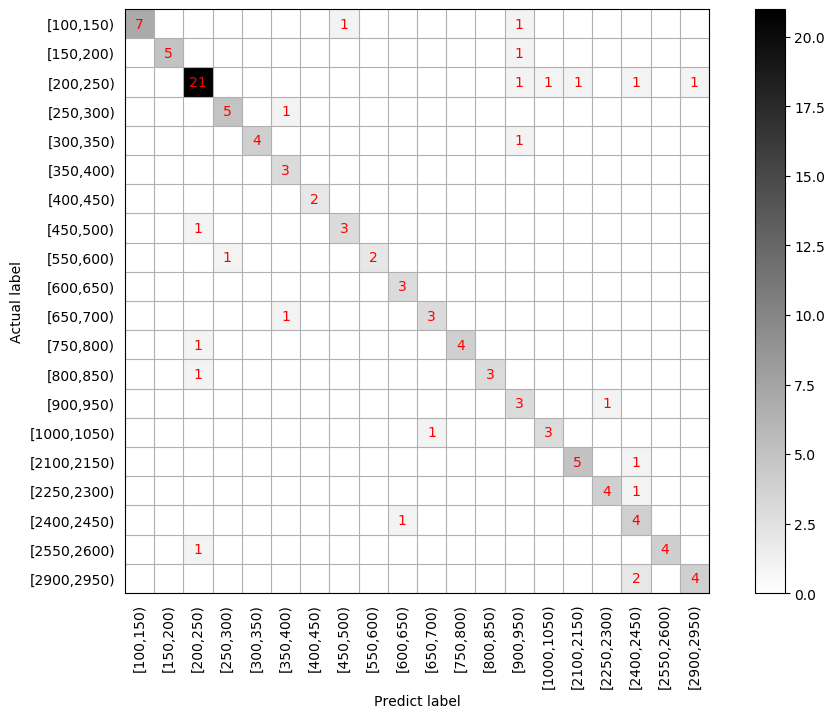

In [133]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# classes表示不同类别的名称，比如这有6个类别
classes = [f'[{i*50},{i*50+50})' for i in set(test_res['true'])]  #[i for i in set(test_res['true'])] 

# random_numbers = np.random.randint(6, size=50)  # 6个类别，随机生成50个样本
# y_true = random_numbers.copy()  # 样本实际标签
# random_numbers[:10] = np.random.randint(6, size=10)  # 将前10个样本的值进行随机更改
# y_pred = random_numbers  # 样本预测标签
y_true = np.array(creat_pred_df['true'].to_list())
y_pred = np.array(creat_pred_df['pred'].to_list())
# 获取混淆矩阵
cm = confusion_matrix(y_true, y_pred)
# # Normalize by row
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print(cm_normalized)
plot_confusion_matrix(cm, classes,f'{result_path}confusion_matrix_{save_name}.png')

In [112]:
cm = cm_df_mod.copy()

In [113]:
#求各项指标
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

precision = TP / (TP+FP)  # 查准率
recall = TP / (TP+FN)  # 查全率

In [114]:
eva_dict = {'FP':FP,'FN':FN,'TP':TP,'TN':TN,'TPR':TPR,'TNR':TNR,'PPV':PPV
            ,'NPV' :NPV ,'FPR':FPR,'FNR':FNR,'FDR':FDR,'precision':precision,'recall':recall}

In [115]:
eva_df = pd.DataFrame(eva_dict)
eva_df.insert(0,'VIS',classes)
eva_df.iloc[:,1:] = eva_df.iloc[:,1:].apply(lambda x:round(x,4))
# eva_df.to_csv(f'{result_path}eva_df_{file[1]}_{save_name}.csv')
eva_df

,VIS,FP,FN,TP,TN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,precision,recall
0,"[100,150)",0.0,2.0,7.0,106.0,0.7778,1.0000,1.0000,0.9815,0.0000,0.2222,0.0000,1.0000,0.7778
1,"[150,200)",0.0,1.0,5.0,109.0,0.8333,1.0000,1.0000,0.9909,0.0000,0.1667,0.0000,1.0000,0.8333
2,"[200,250)",4.0,5.0,21.0,85.0,0.8077,0.9551,0.8400,0.9444,0.0449,0.1923,0.1600,0.8400,0.8077
3,"[250,300)",1.0,1.0,5.0,108.0,0.8333,0.9908,0.8333,0.9908,0.0092,0.1667,0.1667,0.8333,0.8333
4,"[300,350)",0.0,1.0,4.0,110.0,0.8000,1.0000,1.0000,0.9910,0.0000,0.2000,0.0000,1.0000,0.8000
5,"[350,400)",2.0,0.0,3.0,110.0,1.0000,0.9821,0.6000,1.0000,0.0179,0.0000,0.4000,0.6000,1.0000
6,"[400,450)",0.0,0.0,2.0,113.0,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000
7,"[450,500)",1.0,1.0,3.0,110.0,0.7500,0.9910,0.7500,0.9910,0.0090,0.2500,0.2500,0.7500,0.7500
8,"[550,600)",0.0,1.0,2.0,112.0,0.6667,1.0000,1.0000,0.9912,0.0000,0.3333,0.0000,1.0000,0.6667
9,"[600,650)",1.0,0.0,3.0,111.0,1.0000,0.9911,0.7500,1.0000,0.0089,0.0000,0.2500,0.7500,1.0000


<Figure size 1600x800 with 0 Axes>

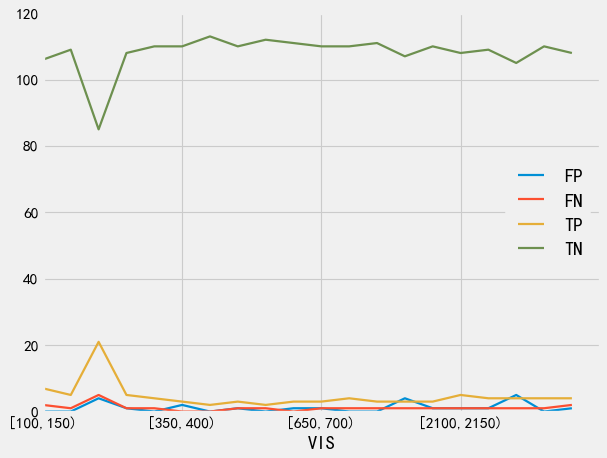

In [203]:
plt.figure(figsize=(20,10))
eva_df1 = eva_df.copy()
eva_df1.set_index('VIS',inplace =True)
eva1 = eva_df1.iloc[:,:4]
eva1.plot(linewidth=2)
# plt.xticks(rotation=90)
# plt.savefig(f'{result_path}eva11_{save_name}.png')
plt.show()

<Figure size 4000x2000 with 0 Axes>

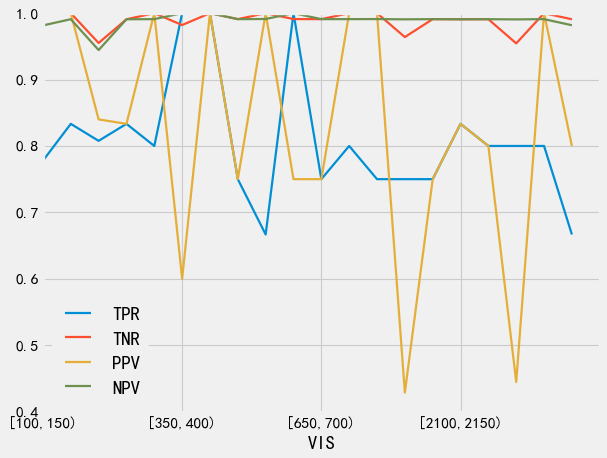

In [204]:
plt.figure(figsize=(50,25))
eva2 = eva_df1.iloc[:,4:-5]
eva2.plot(linewidth=2)
# plt.savefig(f'{result_path}eva12_{save_name}.png')
plt.show()

<Figure size 4000x2000 with 0 Axes>

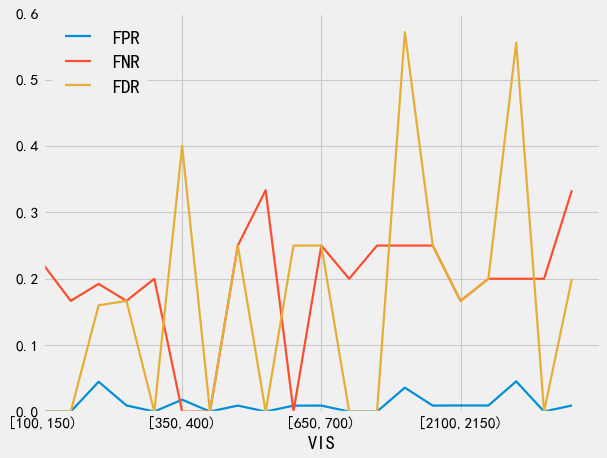

In [205]:
plt.figure(figsize=(50,25))
eva2 = eva_df1.iloc[:,-5:-2]
eva2.plot(linewidth=2)
# plt.savefig(f'{result_path}eva13_{save_name}.png')
plt.show()

<Figure size 4000x2000 with 0 Axes>

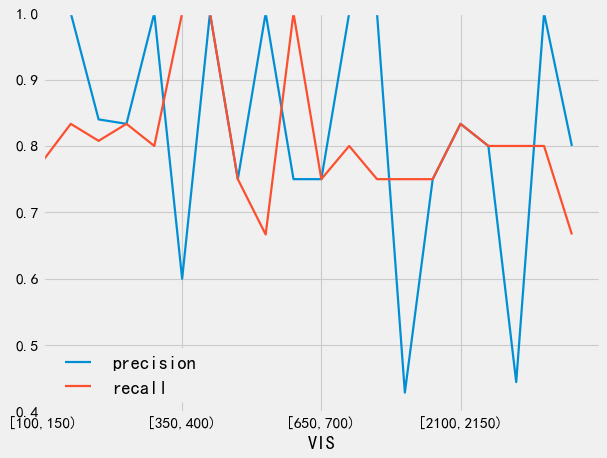

In [206]:
plt.figure(figsize=(50,25))
eva3 = eva_df1.iloc[:,-2:]
eva3.plot(linewidth=2)
# plt.savefig(f'{result_path}eva14_{save_name}.png')
plt.show()

In [163]:

n_val = cm.shape[0]
confusion_matrix = cm.copy()
y_val = y_true.copy() #修改Y_true 和y_pred

<Figure size 1440x720 with 0 Axes>

In [135]:
accu = [0 for _ in range(n_val)]
column = [0 for _ in range(n_val)]
line = [0 for _ in range(n_val)]
recall =[0 for _ in range(n_val)]   #召回率
precision = [0 for _ in range(n_val)] #精准率
accuracy = 0 #准确率
Macro_P = 0    #宏查准率（宏精准率）
Macro_R=0   #宏查全率（宏召回率）
#准确率
for i in range(0,n_val):
    accu[i] = confusion_matrix[i][i]
    accuracy+= float(accu[i])/len(y_val)
    
#宏召回率
for i in range(0,n_val):
    for j in range(0,n_val):
        column[i]+=confusion_matrix[j][i]
    if column[i] != 0:
        recall[i]=float(accu[i])/column[i]
Macro_R=np.array(recall).mean()

#宏精准率
for i in range(0,n_val):
    for j in range(0,n_val):
        line[i]+=confusion_matrix[i][j]
    if line[i] != 0:
        precision[i]=float(accu[i])/line[i]
Macro_P = np.array(precision).mean()

#宏F1
Macro_F1 = (2 * (Macro_P * Macro_R)) / (Macro_P+Macro_R)  


In [139]:
eva_dict1 = {'准确率':accuracy,'宏召回率（Macro_R）':Macro_R,'宏精准率（Macro_P）':Macro_P,'宏F1（Macro_F1）':Macro_F1}
eva_df1 = pd.Series(eva_dict1)
eva_df1 = pd.DataFrame(eva_df1).T
eva_df1.index = ['性能']

eva_df1 = eva_df1.apply(lambda x:round(x,4))
# eva_df1.to_csv(f'{result_path}eva_df1_{file[1]}_{save_name}.csv')
eva_df1

,准确率,宏召回率（Macro_R）,宏精准率（Macro_P）,宏F1（Macro_F1）
性能,0.8,0.829,0.8084,0.8186


In [407]:
# #ROC曲线
# # 引入必要的库
# import numpy as np
# import matplotlib.pyplot as plt
# from itertools import cycle
# from scipy import interp
# from sklearn.metrics import roc_curve, auc
# fpr,tpr,threshold = roc_curve(y_true, y_pred) ###计算真正率和假正率
# fpr = FPR[0]
# tpr = TPR[0]
# # roc_auc = dict()
# # for i in range(n_classes):
# #     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
# #     roc_auc[i] = auc(fpr[i], tpr[i])

# # roc_auc = auc(fpr,tpr)
# plt.figure(figsize = (10,10))
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' ) #% roc_auc[2]
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

In [145]:
#打乱顺序
# from random import shuffle
# chaos =[ i for i in range(len(y_true))]
# shuffle(chaos) 
# y_pred_chaos = [y_pred[i] for i in chaos]
# y_true_chaos = [y_true[i] for i in chaos]

In [197]:
creat_pred_df.head(2)

,Unnamed: 0,TRUE,pred
0,0,0,0
1,1,0,0


In [198]:
creat_pred_df = pd.read_csv(f'{result_path}creat_pred_df6 - 副本.csv')
y_predc =  creat_pred_df['pred']
y_truec = creat_pred_df['TRUE']

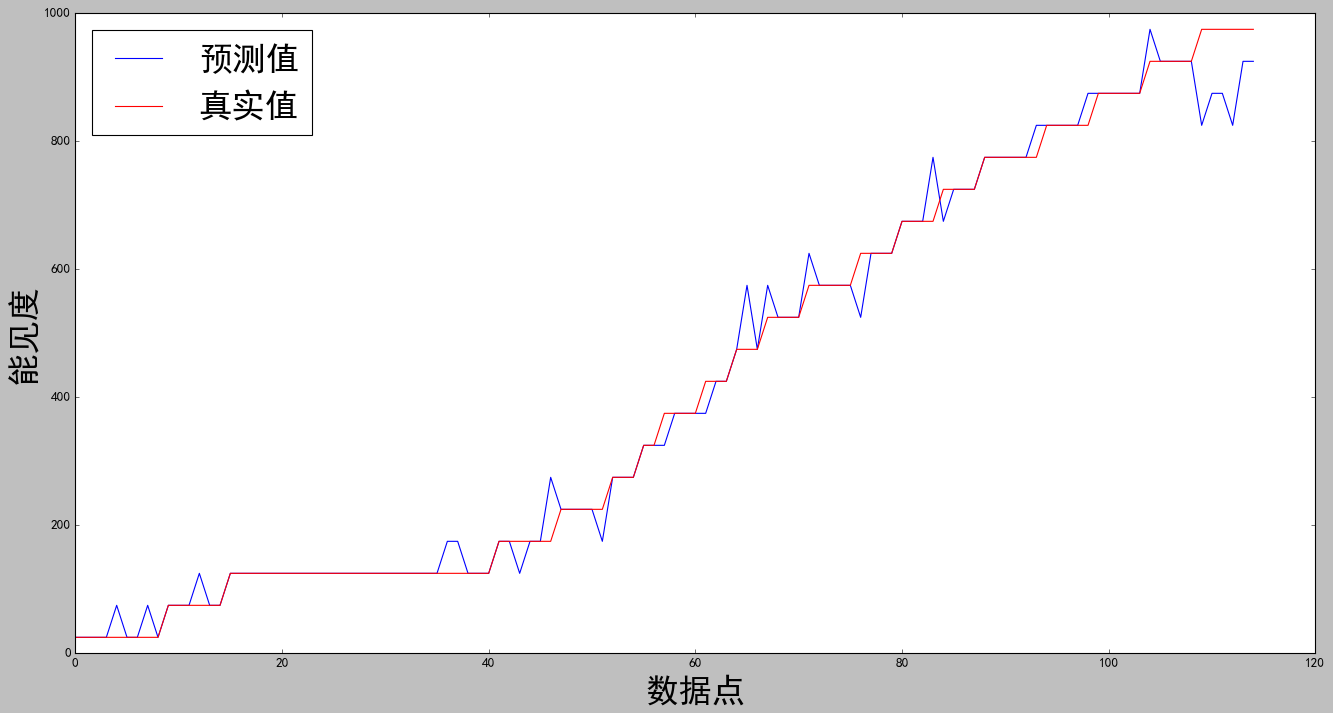

In [201]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']#黑体
# 测试集绘图
font = {'weight' : 'normal',
'size' : 30,
}
plt.figure(figsize=(20,10))

plt.plot(range(len(y_pred)),y_predc*m +m/2,'b',label="预测值") #[i*m + m/2 for i in y_pred_chaos]
plt.plot(range(len(y_pred)),y_truec*m +m/2 ,'r',label="真实值") #[i*m + m/2 for i in y_true_chaos]
plt.legend(loc="upper left",prop = font) #显示图中的标签
# plt.title('测试集对比图')
plt.ylabel("能见度",font)
plt.xlabel('数据点',font)
# plt.savefig(f'{result_path}测试对比{save_name}.png')
plt.show()

## 其他分析

In [52]:
data[data['jpg_name'] == 190075]

,LOCALDATE,RVR_1A,MOR_1A,VIS1A,VIS,delta_sec,jpg_name,class
141,2020-03-13 02:21:00,300.0,62.5,312.5,300.0,8434,190075,31


## 获取类占比

In [39]:
y= [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 10, 10, 13, 13, 13, 13, 13, 13, 13, 13, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 21, 23, 24, 27, 28, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 33, 34, 35, 35, 37, 38, 38, 38, 38, 38, 41, 43, 43, 44, 51, 52, 53, 57, 59, 62, 63, 64, 64, 71, 74, 77]

yy = pd.Series(y)
yy.value_counts()/yy.value_counts().sum(0)

## 读取图片

In [275]:
# day = data[data['LOCALDATE'] >= '2020/3/13 6:00']

In [72]:
# night = data[data['LOCALDATE'] < '2020/3/13 6:00']

In [61]:
idx = 200

In [62]:
jpg_name = round(data.iloc[idx,-2])
jpg_name

301075

In [63]:
str(jpg_name)

'301075'

In [64]:
data.iloc[idx,:]

LOCALDATE    2020-03-13 03:35:00
RVR_1A                       175
MOR_1A                        50
VIS1A                        200
VIS                          175
delta_sec                  12874
jpg_name                  301075
class                         20
Name: 215, dtype: object

In [131]:
jpg_name = 100

In [134]:
# 裁剪图片

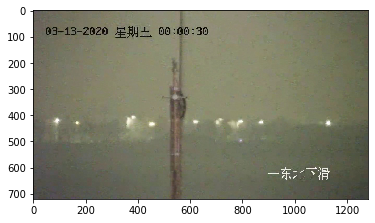

In [132]:
import matplotlib.pyplot as plt
import cv2
img_path = f"D:/pyProject/math/vedio/rgb/{int(jpg_name)}.jpg"
img = plt.imread(img_path)
plt.imshow(img)

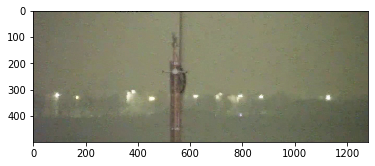

In [133]:
# 方法一
import cv2
cropImg = img[int(100):int(600), int(0):int(8000)]
plt.imshow(cropImg)

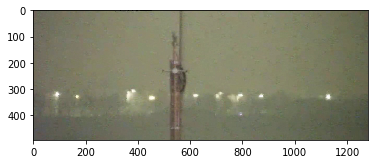

In [182]:
#方法二
from PIL import Image
im = Image.open(img_path)
# 图片的宽度和高度
img_size = im.size
# print("图片宽度和高度分别是{}".format(img_size))
'''
裁剪：传入一个元组作为参数
元组里的元素分别是：（距离图片左边界距离x， 距离图片上边界距离y，距离图片左边界距离+裁剪框宽度x+w，距离图片上边界距离+裁剪框高度y+h）
'''
# 截取图片中一块宽和高都是250的
x = 0
y = 100
w = 1280 
h = 720 -100 -125
cropImg = im.crop((x, y, x+w, y+h))
plt.imshow(cropImg)
# cropImg.save()